Decision Tree

<img src="https://scikit-learn.org/stable/_images/iris.png"/>

In [ ]:
# Gini Square = p^2 + q^2

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sklearn 

In [ ]:
from sklearn.datasets import load_iris

In [ ]:
dataset = load_iris()

In [ ]:
dataset.keys()

dict_keys(['data', 'target', 'target_names', 'DESCR', 'feature_names', 'filename'])

In [ ]:
df = pd.DataFrame(data=dataset.data, columns=dataset.feature_names)
df["target"] = dataset.target

In [ ]:
df.sample(5)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
85,6.0,3.4,4.5,1.6,1
60,5.0,2.0,3.5,1.0,1
18,5.7,3.8,1.7,0.3,0
99,5.7,2.8,4.1,1.3,1
41,4.5,2.3,1.3,0.3,0


In [ ]:
df.columns = [col.replace(" (cm)", "").replace(" ", "_") for col in df.columns]

In [ ]:
df.sample(5)

,sepal_length,sepal_width,petal_length,petal_width,target
104,6.5,3.0,5.8,2.2,2
125,7.2,3.2,6.0,1.8,2
110,6.5,3.2,5.1,2.0,2
42,4.4,3.2,1.3,0.2,0
94,5.6,2.7,4.2,1.3,1


In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
x_train, x_test , y_train, y_test = train_test_split(df.drop(columns=["target"]), df.target, test_size = 0.1)

In [ ]:
  x_train.shape, y_train.shape

((135, 4), (135,))

In [ ]:
x_test.shape, y_test.shape

((15, 4), (15,))

In [ ]:
from sklearn.tree import DecisionTreeClassifier

In [ ]:
dtc = DecisionTreeClassifier()

In [ ]:
dtc.fit(x_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [ ]:
dtc.feature_importances_

array([0.01482213, 0.        , 0.56554087, 0.419637  ])

In [ ]:
pd.DataFrame(dtc.feature_importances_, index =x_train.columns, columns=["Feature_Importance"])

,Feature_Importance
sepal_length,0.014822
sepal_width,0.000000
petal_length,0.565541
petal_width,0.419637


In [ ]:
y_pred = dtc.predict(x_test)

In [ ]:
  from sklearn.tree import plot_tree

In [ ]:
from sklearn.metrics import classification_report

In [ ]:
print(classification_report(y_test.values, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         3
           1       1.00      1.00      1.00         6
           2       1.00      1.00      1.00         6

    accuracy                           1.00        15
   macro avg       1.00      1.00      1.00        15
weighted avg       1.00      1.00      1.00        15



<function matplotlib.pyplot.show>

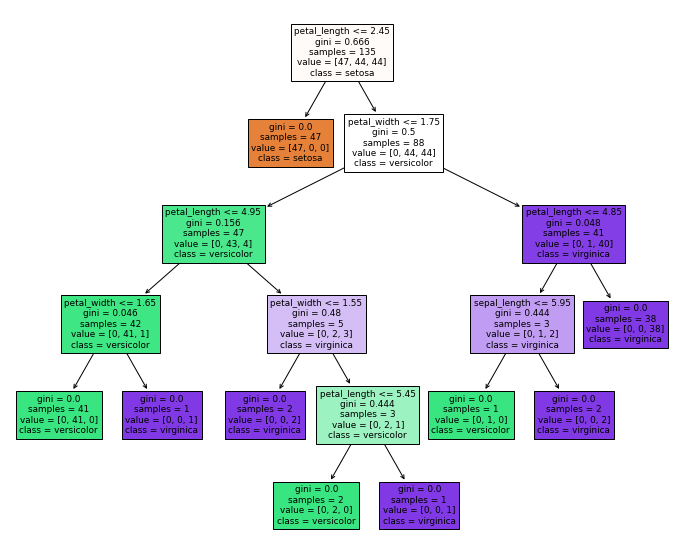

In [ ]:
plt.figure(figsize = (12, 10))
plot_tree(dtc, feature_names = x_train.columns, class_names= dataset.target_names, filled = True
          )
plt.show

In [71]:
# Ovefitting Vs Underfitting
# Underfitting - train_accuracy is low and val_accuracy is low
# Overfitting - train_accuracy is good but val_accuracy is poor

<img src= "https://docs.aws.amazon.com/machine-learning/latest/dg/images/mlconcepts_image5.png"/>

In [72]:
# Decision Trees are prone to overfitting

## Random Forest

In [74]:
# 1. Do not make one tree, take multiple trees
# 2. Do not make them with same column

# 1. Bagging
# 2. Boosting

In [77]:
# 1. Bagging - Make different trees with different combination of columns and later join the treesby ensembling them 
# Majority Ensemble